In [149]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# The goal of this notebook is to examine 3 things:
# 1. average revenue to budget ratio (scalar value)
# 2. Does having a larger budget lead to more revenue?
# 3. Does having a larger budget lead to better ratings?

In [151]:
# read in cleaned movies metainformation
metainfo_data = pd.read_csv('Datasets/cleaned-movies-metainformation.csv')

# We only need budget, id, and revenue, so let's drop all of the other columns.
metainfo_data.drop(['adult', 'belongs_to_collection', 'genres', 'original_language', 'popularity', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'], axis = 1, inplace = True)

# Now we want to get rid of all the rows where budget or revenue is null.
index_names = metainfo_data[metainfo_data['budget'].isnull() | metainfo_data['revenue'].isnull()].index
metainfo_data.drop(index_names, inplace = True)

# To make sure we still have enough data to work with after dropping all of these rows, let's check the size of our dataframe.
print(metainfo_data.size)
# Seems like we have enough data to work with even after all the drops.

# Proceed to check the first few columns of our dataframe.
metainfo_data.head()
# The data looks good, so let's move on!

21520


,budget,id,original_title,revenue
0,30000000.0,862,Toy Story,373554033.0
1,65000000.0,8844,Jumanji,262797249.0
3,16000000.0,31357,Waiting to Exhale,81452156.0
5,60000000.0,949,Heat,187436818.0
8,35000000.0,9091,Sudden Death,64350171.0


In [152]:
# The first thing we want to do is find the average revenue to budget ratio.

# We can find this value by finding the revenue to budget ratio for each row and then averaging all of the ratios.
ratios_sum = 0
for index, row in metainfo_data.iterrows():
    ratios_sum += row['revenue'] / row['budget']
ratios_avg = ratios_sum / metainfo_data.size
# The average revenue to budget ratio means that on average, for every dollar spent on the movie budget, 1855.64 dollars will be made in revenue.
print(ratios_avg)

1391.7330088091044


C:\Users\bonni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlation between Movie Budget and Revenue')

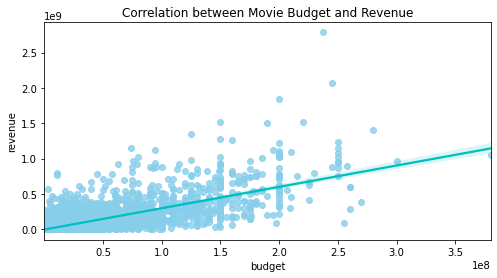

In [153]:
# The next thing we want to tackle is the following question: Does having a larger budget lead to more revenue?
plt.figure(figsize=(8, 4))
sns.regplot(metainfo_data['budget'], metainfo_data['revenue'], scatter_kws={'color':'skyblue'}, line_kws={'color':'c'}).set_title("Correlation between Movie Budget and Revenue")

In [154]:
# Now let's examine the above graph in a little bit more detail. We notice that there are a couple of seemingly "extreme" points in our graph.

# Notice that the movie that made the most revenue didn't have the highest budget. Let's find out the name of this movie.
max_rev_index = metainfo_data[['revenue']].idxmax()
max_rev_movie = metainfo_data._get_value(max_rev_index['revenue'], "original_title")
print(max_rev_movie, "made the most revenue (", metainfo_data['revenue'].max(), ") and only had a budget of", metainfo_data._get_value(max_rev_index['revenue'], "budget"))

# On the other hand, notice that the movie that had the largest budget did not make the most revenue. Let's find out the name of this movie.
max_budget_index = metainfo_data[['budget']].idxmax()
max_budget_movie = metainfo_data._get_value(max_budget_index['budget'], "original_title")
print(max_budget_movie, "had the largest budget (", metainfo_data['budget'].max(), ") but only had a revenue of", metainfo_data._get_value(max_budget_index['budget'], "revenue"))

Avatar made the most revenue ( 2787965087.0 ) and only had a budget of 237000000.0
Pirates of the Caribbean: On Stranger Tides had the largest budget ( 380000000.0 ) but only had a revenue of 1045713802.0


In [155]:
# And last but not least, does having a larger budget lead to better ratings?

# To answer this question, we'll need to have to use data about movie ratings.
ratings_data = pd.read_csv('Datasets/ratings_small.csv')

# Let's get rid of the columns we don't need.
ratings_data.drop(['timestamp', 'userId'], axis = 1, inplace = True)

# Now we want to get rid of all the rows where rating is null or out of range. (The valid range for ratings_small.csv is between 0 and 5 inclusive.)
index_names = ratings_data[ratings_data['rating'].isnull() | (ratings_data['rating'] < 0) | (ratings_data['rating'] > 5)].index
metainfo_data.drop(index_names, inplace = True)

# Group by movieId to find the average rating for each movie.
ratings_grouped = ratings_data.groupby('movieId').mean().reset_index()

# Drop null values if any.
ratings_grouped.dropna()

# Let's examine the first few rows.
ratings_grouped.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [156]:
# Now let's merge data from the 2 different csv files together based on equivalent movie id.

# We'll start by renaming the movieId column in ratings_grouped into id to match with the equivalent id column name in metainfo_data.
ratings_grouped.rename(columns={'movieId':'id'}, inplace=True)

# Make sure the two columns that we plan to merge together are of the same type.
metainfo_data['id'] = metainfo_data['id'].astype(str)
ratings_grouped['id'] = ratings_grouped['id'].astype(str)

# Finally, perform an inner join on the two tables.
merged_data = metainfo_data.merge(ratings_grouped, on='id', how='inner')

# Let's examine the first few columns.
merged_data.head()

,budget,id,original_title,revenue,rating
0,60000000.0,949,Heat,187436818.0,3.593750
1,58000000.0,710,GoldenEye,352194034.0,1.500000
2,98000000.0,1408,Cutthroat Island,10017322.0,3.616279
3,52000000.0,524,Casino,116112375.0,3.555556
4,16500000.0,4584,Sense and Sensibility,135000000.0,5.000000


C:\Users\bonni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlation between Movie Budget and Rating')

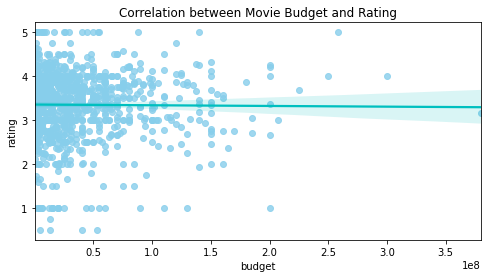

In [157]:
# DECIDE WHICH GRAPH TO USE
# OPTION 1: USING SEABORN

# Using the table above, let's graph budget against rating.
plt.figure(figsize=(8, 4))
sns.regplot(merged_data['budget'], merged_data['rating'], scatter_kws={'color':'skyblue'}, line_kws={'color':'c'}).set_title("Correlation between Movie Budget and Rating")

Text(0, 0.5, 'rating')

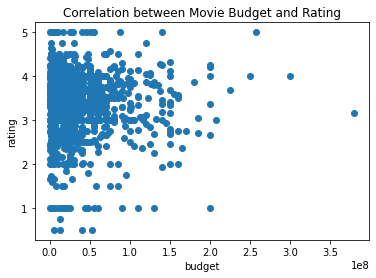

In [158]:
# OPTION 2: USING MATPLOTLIB
# Using the table above, let's graph budget against rating.
plt.scatter(merged_data.budget, merged_data.rating)
plt.title('Correlation between Movie Budget and Rating')
plt.xlabel('budget')
plt.ylabel('rating')

In [159]:
print("Based on the graph above, it seems like there isn't much correlation between movie budget and rating.")
print("To double check, let's find the covariance between movie budget and rating:", np.cov(merged_data.budget, merged_data.rating)[0][1])
print("While this seems like a big number, compared to the values in our data, the covariance is so small that it can be considered negligible.")
print("Thus, we can conclude that a movie's budget has very little influence on its rating.")

Based on the graph above, it seems like there isn't much correlation between movie budget and rating.
To double check, let's find the covariance between movie budget and rating: -290285.92118326976
While this seems like a big number, compared to the values in our data, the covariance is so small that it can be considered negligible.
Thus, we can conclude that a movie's budget has very little influence on its rating.


In [160]:
# FURTHER EXPLORATION: Movie Budget and Rating
# plt.figure(figsize=(8, 4))
# sns.regplot(merged_data['rating'], merged_data['revenue'], scatter_kws={'color':'skyblue'}, line_kws={'color':'c'}).set_title("Correlation between Movie Budget and Rating")
# print(np.cov(merged_data.rating, merged_data.revenue)[0][1])